Please fill out the information of your group!

| <p style="text-align: center;">First Name</p> | <p style="text-align: center;">Family Name</p> | Matr.-No. |
|-----------------------------------------|-----------------------------------------| --- |
| <p style="text-align: left">*Daniil*</p>     | <p style="text-align: left">*Krechko*</p>     | *k12149099* |
| <p style="text-align: left">*Azat*</p> | <p style="text-align: left">*Vakhitov*</p> | *k12148222* |



<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2023/24)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 2</h1>
<h2 style="color:rgb(0,120,170)">Getting to Know Word Embedding!</h2>

<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Shah Nawaz, Shahed Masoudian<br>


<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-taskA"><li style="font-size:large;font-weight:bold">Task A: Words Similarity and Nearest Neighbors (15 points)</li></a>
    <a href="#section-taskB"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Word Embedding (15 points)</li></a>
    <a href="#section-taskC"><li style="font-size:large;font-weight:bold">Task C: Classification with sent2vec Document Embeddings (2 extra point)</li></a>
    <a href="#section-references"><li style="font-size:large;font-weight:bold">References</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

### Assignment objective
The aim of this assignment is to get familiarized with using word embedding (WE) models in practice. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.


### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.


## Style 

- Please provide evidence at each state by giving print of the results, provide tables, graphs to further improve the quality of your report


### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


In [32]:
#Import all libraries
from gensim.models import KeyedVectors
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from IPython.display import display
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [33]:
#For usability of use on different laptops
PLOTS_SHOW = False
WIN_PATHS_ENABLED = False

In [34]:
#All needed methods
def full_vocabluary(data):
    all_tokens = [token for doc in data['Text'] for token in doc]

    token_counts = Counter(all_tokens)

    vocab = dict(token_counts)
    return vocab

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

def preprocessing(data):
    
    pattern_2 = r'^"|"$'
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_2, '', x))
    
    pattern_3 = r'\s+'
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_3, ' ', x))
    
    written_date_pattern = r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s*)?(?:January|February|March|April|May|June|July|August|September|October|November|December)\s*(?:\d{1,2}(?:st|nd|rd|th)?)?\s*(?:\d{4})?\b'
    data['Text'] = data['Text'].apply(lambda x: re.sub(written_date_pattern, '|date| ', x))
    
    percent_pattern = r'\b\d+(?:\s*(?:percent|per\s*cent|%))\b'
    number_pattern = r'\b(?:\d{1,3}(?:[\.,\s]?\d{3})*(?:[\.,]?\d+)?(?:\s*(?:hundred|thousand|million|billion|trillion|k|K|m|M))?|\d+(?:\.\d+)?(?:\s*(?:kg|g|lbs|cm|m|km|ft|in))?)\b'
    percent_patter_0 = r'.*%'
    
    data['Text'] = data['Text'].apply(lambda x: re.sub(percent_pattern, '|num| ', x))
    data['Text'] = data['Text'].apply(lambda x: re.sub(number_pattern, '|num| ', x))
    data['Text'] = data['Text'].apply(lambda x: re.sub(percent_patter_0, '', x))
    
    # Remove marks
    marks_pattern = r'[^\w\s|]'
    data['Text'] = data['Text'].apply(lambda x: re.sub(marks_pattern, ' ', x))
    
    # Convert text to lowercase
    data['Text'] = data['Text'].apply(lambda x: x.lower())
    data['Text'] = data['Text'].apply(remove_stop_words)
    
    # Remove extra whitespace
    data['Text'] = data['Text'].apply(lambda x: re.sub(pattern_3, ' ', x))
    
    # Tokenize and lemmatize
    words = data['Text'].apply(word_tokenize)
    tagged_words = words.apply(pos_tag)
    data['Text'] = tagged_words.apply(lemmatize)
    
    # Replace |num| and |date| back to <num> and <date>
    data['Text'] = data['Text'].apply(lambda tokens: [token.replace('|num|', '<num>').replace('|date|', '<date>') for token in tokens])
    
    return data

def get_wordnet_pos(tag):
    if tag.startswith('NN'):
        return 'n'  # noun
    elif tag.startswith('VB'):
        return 'v'  # verb
    elif tag.startswith('JJ'):
        return 'a'  # adjective
    elif tag.startswith('RB'):
        return 'r'  # adverb
    else:
        return None

def lemmatize(tagged_sentence):
    lemmatized_words = []
    for word, tag in tagged_sentence:
        wordnet_pos = get_wordnet_pos(tag)
    
        if wordnet_pos is None:
            wordnet_pos = 'n'
    
        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
    
        lemmatized_words.append(lemmatized_word)
    return lemmatized_words


def token_statistics(vocab):
    filtered_vocab_1 = {token: count for token, count in vocab.items() if token not in {'<num>', '<date>'}}
    
    counts = list(filtered_vocab_1.values())
    mean_1 = np.mean(counts)
    max_count_1 = np.max(counts)
    min_count_1 = np.min(counts)
    std_dev_1 = np.std(counts)

    return mean_1, max_count_1, min_count_1, std_dev_1

def filter_vocab(vocab, min_freq):
    filtered_vocab = {token: count for token, count in vocab.items() if count >= min_freq}
    return filtered_vocab


def replace_with_oov(data, vocab):
    return [[token if token in vocab else '<OOV>' for token in doc] for doc in data['Text']]

def replace_with_oov_avoid(data, vocab):
    return [[token if token in vocab else token for token in doc] for doc in data['Text']]

def token_statistics_after(vocab_filtered):
    filtered_vocab_2 = {token: count for token, count in vocab_filtered.items() if token not in {'<num>', '<date>'}}
    
    counts = list(filtered_vocab_2.values())  
    mean_2 = np.mean(counts)
    max_count_2 = np.max(counts)
    min_count_2 = np.min(counts)
    std_dev_2 = np.std(counts)

    return mean_2, max_count_2, min_count_2, std_dev_2

def calculate_document_frequencies(data, word_to_index):
    df = np.zeros(vocab_size, dtype=int)
    for doc in data:
        unique_terms = set(doc)
        for term in unique_terms:
            if term in word_to_index:
                index = word_to_index[term]
                df[index] += 1
    return df

def compute_tfidf_vectors(data, word_to_index, df, N):
    idf = np.log(N / (df + 1))

    vectors = []
    for doc in data:
        vector = np.zeros(vocab_size)
        term_counts = Counter(doc)
        for term, count in term_counts.items():
            if term in word_to_index:
                index = word_to_index[term]
                tf = count 
                vector[index] = tf * idf[index]
        vectors.append(vector)
    return vectors

#Sparsity rate
def calculate_sparsity(vectors):
    total_elements = 0
    zero_elements = 0
    for vector in vectors:
        total_elements += len(vector)
        zero_elements += np.count_nonzero(vector == 0)
    sparsity_rate = (zero_elements / total_elements) * 100
    return sparsity_rate

        
def analyze_word_contributions_by_category(data, category_column, text_column):
    word_category_counts = {}
    category_totals = {}
    for _, row in data.iterrows():
        category = row[category_column]
        words = row[text_column]
        if category not in word_category_counts:
            word_category_counts[category] = Counter()
        word_category_counts[category].update(words)
        
        if category not in category_totals:
            category_totals[category] = 0
        category_totals[category] += len(words)

    word_contributions = {}
    for category, counter in word_category_counts.items():
        total = category_totals[category]
        word_contributions[category] = {word: count / total for word, count in counter.items()}

    return word_contributions 

def plot_word_contributions(word_contributions, category, top_n=10):
    words, contributions = zip(*sorted(word_contributions[category].items(), key=lambda item: item[1], reverse=True)[:top_n])
    plt.figure(figsize=(10, 6))
    plt.barh(words, contributions, color='skyblue')
    plt.xlabel('Word Contribution')
    plt.title(f'Top {top_n} Word Contributions in Category: {category}')
    plt.gca().invert_yaxis()
    plt.show()

#TASK A PART 1
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def plot_similarity(word, nearest_neighbors, metric):
    neighbors, similarities = zip(*nearest_neighbors)  # Unpack neighbors and their similarity scores
    
    plt.figure(figsize=(10, 6))
    plt.barh(neighbors, similarities, color="skyblue")  # Horizontal bar plot
    plt.xlabel(f"{metric} Similarity")
    plt.ylabel("Target Words")
    plt.title(f"{metric} Similarity for Word: '{word}'")
    plt.gca().invert_yaxis()  
    
    plt.xlim(0.0, 1.0)
    
    plt.show()

    
    
# Calculate nearest neighbors - TASK A PART 2
def calculate_nearest_neighbours(source_words, target_words, model, k, cosine: bool, dot: bool):
    # Get source embeddings (n_source, embedding_dim)
    source_embeddings = np.array([model[word] for word in source_words])  

    # Get target embeddings (n_target, embedding_dim)
    target_embeddings = np.array([model[word] for word in target_words])  

    results = {}

    if cosine:
        # Normalize both source and target embeddings
        source_norms = np.linalg.norm(source_embeddings, axis=1, keepdims=True)  # (n_source, 1)
        target_norms = np.linalg.norm(target_embeddings, axis=1, keepdims=True)  # (n_target, 1)

        source_embeddings = source_embeddings / source_norms  # Normalize source embeddings
        target_embeddings = target_embeddings / target_norms  # Normalize target embeddings

        # Compute cosine similarity for all sources against all targets
        similarity_matrix = np.dot(source_embeddings, target_embeddings.T)  # (n_source, n_target)
    elif dot:
        similarity_matrix = np.dot(source_embeddings, target_embeddings.T)  # (n_source, n_target)
    else:
        raise ValueError("Please specify a similarity metric (cosine or dot).")
    
    # Extract top-k neighbors for each source word
    for i, source_word in enumerate(source_words):
        # Get top-k indices and scores (sorted in descending order)
        top_k_indices = np.argsort(-similarity_matrix[i])[:k]  # Negative for descending sort
        top_k_words = [(target_words[idx], similarity_matrix[i][idx]) for idx in top_k_indices]
        results[source_word] = dict(top_k_words)
    
    return results

#TASK B
def create_vocab(data):
    all_tokens = [word for doc in data['Text'] for word in doc]
    return dict(Counter(all_tokens))


def compute_document_embeddings(data, word_embeddings, embedding_dim=300):
    document_embeddings = []
    for doc in data['Text']:
        embeddings = [word_embeddings[word] for word in doc if word in word_embeddings]
        if embeddings:
            doc_embedding = np.mean(embeddings, axis=0)
        else:
            doc_embedding = np.zeros(embedding_dim)
        document_embeddings.append(doc_embedding)
    return np.array(document_embeddings)


def map_word_embeddings(vocab, model, embedding_dim=300):
    embeddings = {}
    for word in vocab:
        if word in model:
            embeddings[word] = model[word]
        else:
            embeddings[word] = np.random.uniform(-0.1, 0.1, embedding_dim)
    return embeddings


# Function to merge cosine and dot product results into a comparison table
def create_comparison_table(source_words, similarities_cos, similarities_dot):
    comparison_tables = {}
    
    for source_word in source_words:
        # Get top neighbors for both metrics
        cos_neighbors = similarities_cos[source_word]
        dot_neighbors = similarities_dot[source_word]
        
        # Create a dataframe with both metrics
        table_data = {
            "Cosine Neighbor": list(cos_neighbors.keys()),
            "Cosine Similarity": list(cos_neighbors.values()),
            "Dot Product Neighbor": list(dot_neighbors.keys()),
            "Dot Product Similarity": list(dot_neighbors.values()),
        }
        comparison_table = pd.DataFrame(table_data)
        comparison_tables[source_word] = comparison_table
    
    return comparison_tables


<a name="section-taskA"></a><h2 style="color:rgb(0,120,170)">Task A: Words Similarity and Nearest Neighbors (15 points)</h2>


**Loading a word embedding (WE) model (1 points).** Download a pre-trained word embedding model such as word2vec (https://code.google.com/archive/p/word2vec/) or GloVe (https://nlp.stanford.edu/projects/glove/). You can load the downloaded vectors into arrays, or use libraries such as `gensim` to download and process the vectors. 

**Calculating word-to-word similarities (4 points).** Select <ins>5 arbitrary words</ins> from 5 different topics like objects, science disciplines, verbs, adjectives, animals, etc. Let us refer to these words as *source words*. For each source word, calculate its cosine similarities to <ins>6 target words</ins>. The target words of each source word are also selected by you and should cover various levels of semantic relations – according to your linguistic judgement – to the source word, namely from highly-related to not related at all. Organize the target words in tables, such that the target words of each source word are sorted from the highest to the lowest relevance (according to your judgement). Consider the following points:

- **Implementation (2/4 points):** Implement cosine similarity as a function that takes two vectors and returns the similarity score. Implement cosine by yourself and do NOT use the provided functionalities of any library.
- **Reporting and observations (2/4 points):** Report the calculated similarities side by side with your word-to-word semantic relevance judgements in tables. Compare the results and report your observations.  

**Calculating nearest neighbors (10 points).** For the 5 source words, retrieve the $k=10$ nearest neighbors using the word embedding model, namely the words with the highest similarities to the source word. Consider the following points: 
    
- **Overall implementation (3/10 points):** your implemented function takes a source vector, a set of target vectors, and the $k$ parameter, and returns the $k$ nearest neighbors and their similarity scores. Implement nearest neighbor calculation by yourself and do NOT use the provided functionalities of any library.
- **Similarity metrics (2/10 points):** execute the calculation of nearest neighbors according to <ins>two similarity metrics</ins> namely cosine and dot product.
- **Efficiency (3/10 points):** your nearest neighbor functions should provide an *efficient* calculation of nearest neighbors. An inefficient way (which should be avoided!) would be looping over the set of vectors in the word embedding model, and one by one calculating the cosine/dot product similarity of the source vector to each of the target vectors. As a hint for an efficient way, consider that in `numpy` (and other libraries), calculating the dot product of a vector to a matrix is much faster than the dot products of the vector to each vector of the matrix.
- **Reporting and observations (2/10 points):** report the results in tables, which enable comparing between the outputs of the two similarity metrics. Which similarity metric would you prefer? Report your observations.

</div>

### Recap of Assignment 1
Fitstly, we decided to get some recap from assignment 1 and retrieve useful statistics to further use it to investigate how is it going to work with our word embedding model.

In [35]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4') 

stop_words = {
    'the', 'a', 'and', 'to', 'be', 'in', 'that', 'of', 'for', 'on', 'with', 'at', 'by', 'an', 'this',
    'it', 'is', 'was', 'from', 'or', 'but', 'are', 'we', 'can', 'you', 'all', 'have', 'which',
    'there', 'their', 'they', 'who', 'about', 'were', 'had', 'has', 'will', 'my', 'your', 'more', 'if',
    'do', 'does', 'theirs', 'how', 'all', 'any', 'some', 'than', 'then', 'been', 'being',
    'i', 'me', 'us', 'he', 'she', 'him', 'her', 'ours', 'yours', 'ourselves', 'yourself', 'yourselves', 
    'himself', 'herself', 'itself', 'ours', 'those', 'such', 'same', 'so', 'up', 'down', 'where', 
    'when', 'out', 'just', 'over', 'after', 'before', 'once', 'during', 'also', 'because', 'now', 
    'off', 'here', 'one', 'each', 'both', 'either', 'every', 'other', 'again', 'between', 'few', 
    'own', 'against', 'into', 'under', 'above', 'upon', 'among', 'together', 'while', 'nor', 'could', 
    'would', 'should', 'might', 'must', 'very', 'without', 'within', 'through', 'around', 'towards', 
    'onto', 'yet', 'ever', 'always', 'often', 'almost', 'even', 'especially', 'mostly'
}

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /Users/bayve/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/bayve/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/bayve/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bayve/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/bayve/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/bayve/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
if WIN_PATHS_ENABLED:
    test = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\NLP\nlp2024_25_data\nlp2023_24_data\thedeep.subset.test.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
else:
    test = pd.read_csv(r"/Users/bayve/Desktop/JKU/NLP/Assignments/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.test.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')

test = test.drop('ID', axis=1)

test = preprocessing(test)

print("Test Data:")
display(test.head())


Test Data:


,Text,Label
0,"[decrease, mam, child, admission, <num>, <date...",8
1,"[<num>, fear, ebola, lead, attack, health, wor...",9
2,"[wheat, staple, food, most, afghan, comprise, ...",3
3,"[receive, serious, allegation, two, lna, fight...",9
4,"[somali, <num>, <num>, woredas, hotspot, <num>...",8


In [37]:
group_per_label = dict()
labels = np.sort(test["Label"].unique())
label_counts = test["Label"].value_counts()
for label in labels:
    group_per_label[label] = []

for idx, row in test.iterrows():
    label = row["Label"]
    group_per_label[label].append(row)

print(label_counts)

Label
4     635
9     615
3     405
10    180
11    172
2     123
5     121
8     112
1     107
0      45
7      45
6      35
Name: count, dtype: int64


In [38]:
rows_with_specific_label = list()
for i in labels:
    rows_with_specific_label.append(test[test["Label"] == i])

In [39]:
vocab_test = full_vocabluary(rows_with_specific_label[0])

mean_1, max_count_1, min_count_1, std_dev_1 = token_statistics(vocab_test)
print("Stats of the dictionary before reduction:")
print(f"Mean (excluding <num> and <date>): {mean_1}")
print(f"Max (excluding <num> and <date>): {max_count_1}")
print(f"Min (excluding <num> and <date>): {min_count_1}")
print(f"Standard Deviation (excluding <num> and <date>): {std_dev_1}")

min_freq = mean_1/2

vocab_test_copy = vocab_test
test_filtered_vocab = filter_vocab(vocab_test_copy, min_freq)

test_data = replace_with_oov_avoid(test, test_filtered_vocab)

mean_2, max_count_2, min_count_2, std_dev_2 = token_statistics_after(test_filtered_vocab)

print("Stats of the dictionary after reduction:")
print(f"Mean (excluding <num> and <date>): {mean_2}")
print(f"Max (excluding <num> and <date>): {max_count_2}")
print(f"Min (excluding <num> and <date>): {min_count_2}")
print(f"Standard Deviation (excluding <num> and <date>): {std_dev_2}")

vocab_list = sorted(test_filtered_vocab.keys())
word_to_index = {word: idx for idx, word in enumerate(vocab_list)}
vocab_size = len(vocab_list)
print(f"Vocabulary Size: {vocab_size}")

df = calculate_document_frequencies(test_data, word_to_index)
N = len(test_data) 

tfidf_test_vectors = compute_tfidf_vectors(test_data, word_to_index, df, N)

tfidf_test_sparsity = calculate_sparsity(tfidf_test_vectors)

print(f"TF-IDF Test Sparsity Rate: {tfidf_test_sparsity:.2f}%")

Stats of the dictionary before reduction:
Mean (excluding <num> and <date>): 2.087216248506571
Max (excluding <num> and <date>): 26
Min (excluding <num> and <date>): 1
Standard Deviation (excluding <num> and <date>): 2.4068384289869833
Stats of the dictionary after reduction:
Mean (excluding <num> and <date>): 4.003300330033003
Max (excluding <num> and <date>): 26
Min (excluding <num> and <date>): 2
Standard Deviation (excluding <num> and <date>): 3.201173825379828
Vocabulary Size: 305
TF-IDF Test Sparsity Rate: 96.46%


In [40]:
stop_words = set(stopwords.words("english"))

word_contributions_list = list()
most_pop_words_from_each_category = list()
all_words_list = list()
for class_rows in rows_with_specific_label:
    word_contributions = analyze_word_contributions_by_category(class_rows, "Label", "Text")
    
    filtered_word_contributions = {
        category: {
            word: count for word, count in word_counts.items()
            if len(word) > 1 and word not in stop_words and word not in {"<num>", "<date>"}
        }
        for category, word_counts in word_contributions.items()
    }
    
    if all(len(words) == 0 for words in filtered_word_contributions.values()):
        continue
    
    for category, word_counts in filtered_word_contributions.items():
        print(f"Word contributions for category '{category}':")
        
        sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
        for word, count in sorted_words:
            all_words_list.append(word)
        top_words_dict = sorted_words[:10]
        top_words_string = list()
        for word, count in top_words_dict:
            top_words_string.append(word)
            print(f"{word}: {count}")
        
        print("\n")
    most_pop_words_from_each_category.append(top_words_string)
    word_contributions_list.append(filtered_word_contributions)


Word contributions for category '0':
crop: 0.014130434782608696
season: 0.010869565217391304
area: 0.010326086956521738
farmer: 0.009782608695652175
agriculture: 0.008152173913043478
year: 0.007065217391304348
rain: 0.007065217391304348
report: 0.006521739130434782
production: 0.006521739130434782
price: 0.005978260869565218


Word contributions for category '1':
people: 0.01221443112418005
need: 0.011309658448314861
area: 0.009047726758651889
humanitarian: 0.0081429540827867
assistance: 0.006785795068988917
displace: 0.006333408731056322
say: 0.006107215562090025
food: 0.006107215562090025
water: 0.005654829224157431
child: 0.0054286360551911335


Word contributions for category '2':
school: 0.04489059327769005
child: 0.02278366794495827
education: 0.018046469659372885
teacher: 0.009925558312655087
year: 0.008120911346717798
student: 0.005865102639296188
refugee: 0.005639521768554027
need: 0.005639521768554027
area: 0.0054139408978118655
due: 0.004962779156327543


Word contributions 

### Most popular words correlation
Before we started the Assignment tasks, we decided to begin with initial investigation of our model. We wanted to see if there are really correlated similarities between the most important words in each category.

In [41]:
#LOAD THE MODEL (we are using word2vec)

if(WIN_PATHS_ENABLED):
    model_path = "GoogleNews-vectors-negative300.bin" 
else:
    model_path = "/Users/bayve/Desktop/JKU/NLP/word2vec/GoogleNews-vectors-negative300.bin" 

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

Most popular words for category '0':
Similarity score to the word crop:
  agriculture: 0.4419
  farmer: 0.4264
  production: 0.2810
  rain: 0.2720
  season: 0.2657
  year: 0.2202
  price: 0.0976
  area: 0.0615
  report: 0.0535


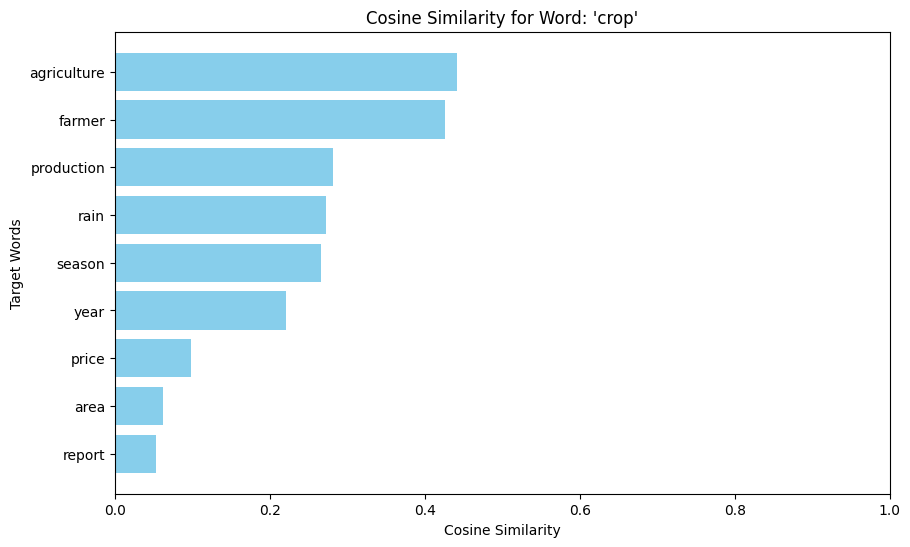

Most popular words for category '1':
Similarity score to the word people:
  child: 0.2899
  say: 0.2540
  food: 0.2226
  need: 0.1670
  humanitarian: 0.1626
  area: 0.1538
  assistance: 0.1435
  water: 0.1407
  displace: 0.0849


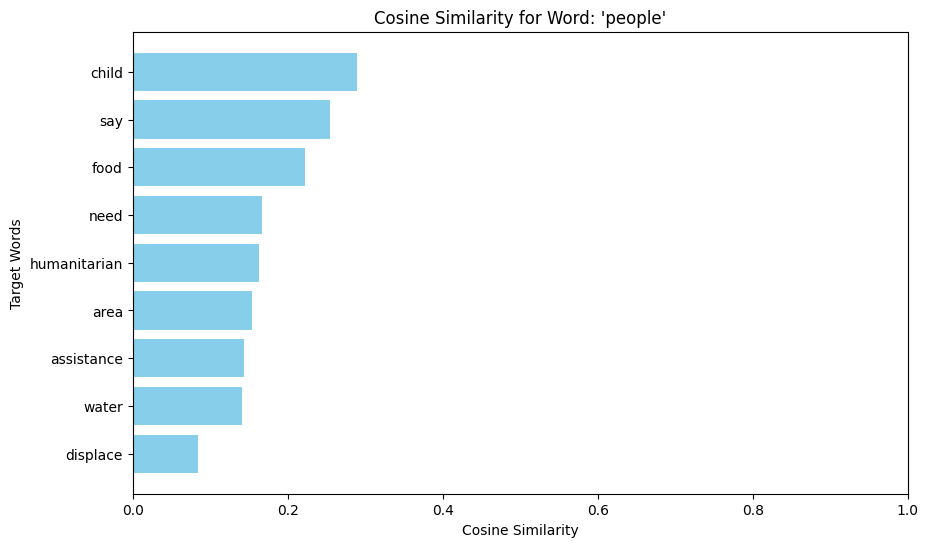

Most popular words for category '2':
Similarity score to the word school:
  teacher: 0.6382
  student: 0.6056
  education: 0.5055
  child: 0.3757
  year: 0.2452
  refugee: 0.2206
  area: 0.1447
  need: 0.1409
  due: 0.0625


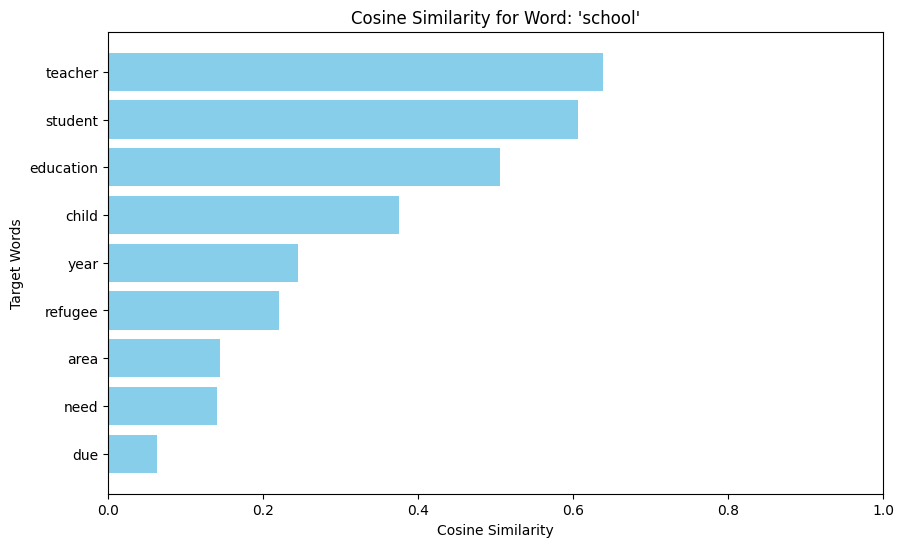

Most popular words for category '3':
Similarity score to the word food:
  household: 0.2811
  people: 0.2226
  area: 0.1774
  price: 0.1608
  increase: 0.1022
  season: 0.0331
  average: 0.0311
  ipc: 0.0308
  phase: -0.0128


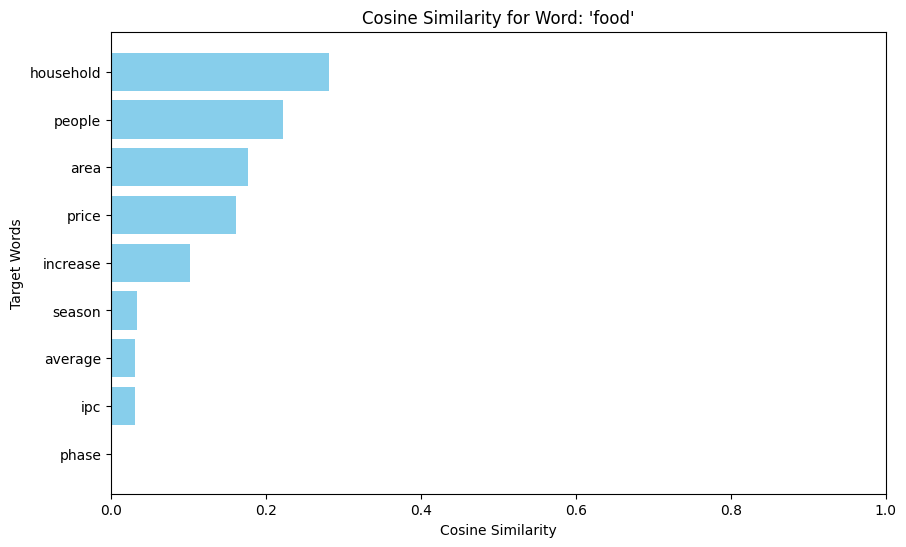

Most popular words for category '4':
Similarity score to the word case:
  suspect: 0.3295
  report: 0.2421
  death: 0.2364
  outbreak: 0.2208
  state: 0.1508
  hospital: 0.1289
  cholera: 0.1181
  people: 0.0955
  health: 0.0935


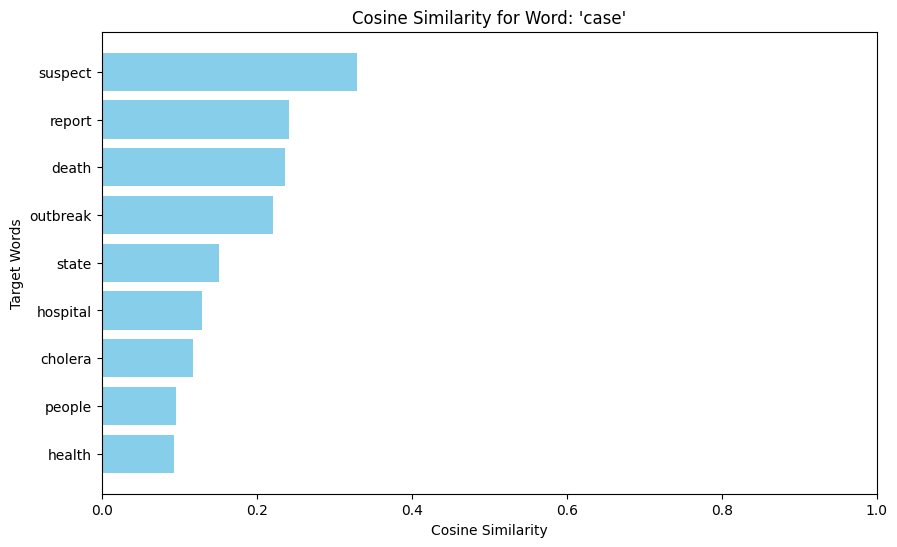

Most popular words for category '5':
Similarity score to the word area:
  food: 0.1774
  livelihood: 0.1609
  people: 0.1538
  say: 0.1454
  livestock: 0.1333
  report: 0.1233
  household: 0.1057
  farmer: 0.0824
  price: 0.0391


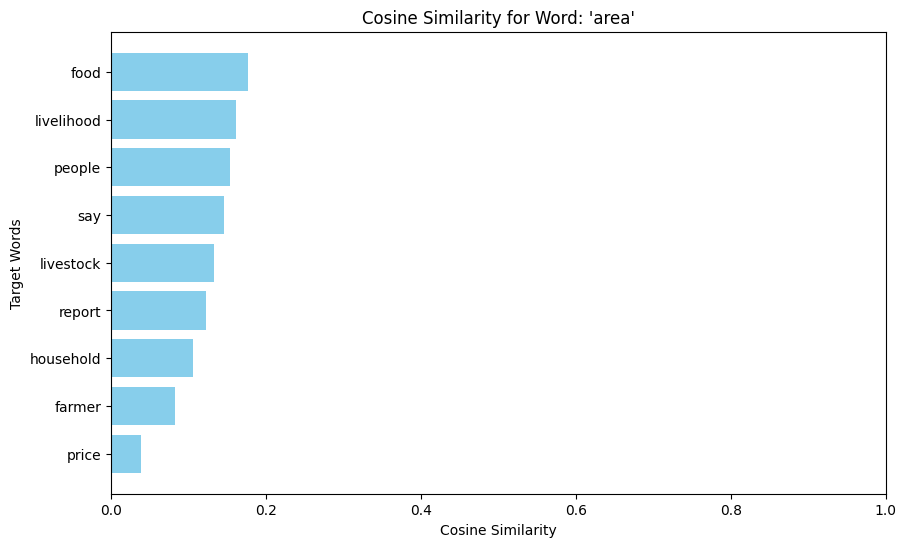

Most popular words for category '6':
Similarity score to the word humanitarian:
  food: 0.2409
  port: 0.1701
  supply: 0.1570
  population: 0.1179
  road: 0.1133
  access: 0.0895
  area: 0.0458
  report: 0.0164
  affect: 0.0047


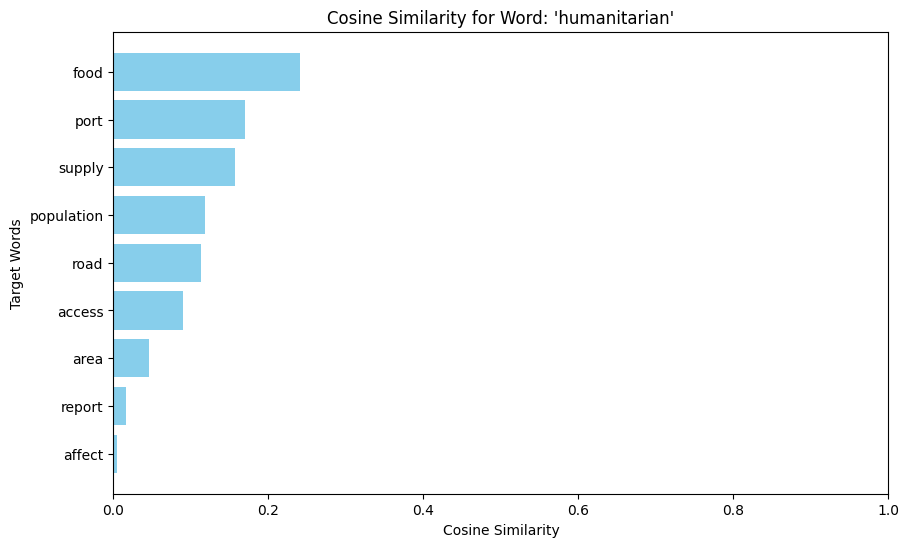

Most popular words for category '7':
Similarity score to the word fuel:
  electricity: 0.4546
  power: 0.3430
  supply: 0.3280
  say: 0.1169
  need: 0.1063
  report: 0.1044
  people: 0.1038
  item: 0.0990
  gaza: 0.0790


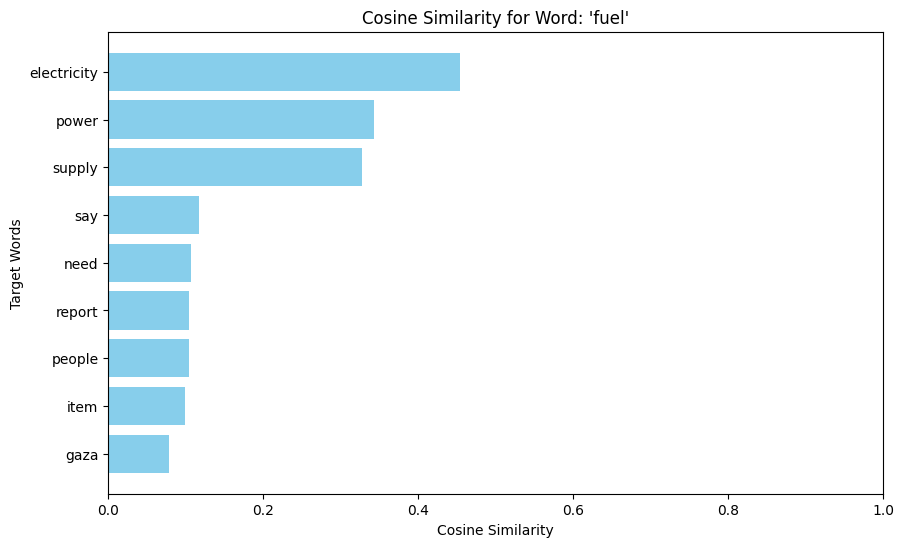

Most popular words for category '8':
Similarity score to the word child:
  malnutrition: 0.3426
  nutrition: 0.2455
  food: 0.1948
  rate: 0.1575
  severe: 0.1549
  acute: 0.1203
  region: 0.0535
  high: 0.0287
  sam: 0.0025


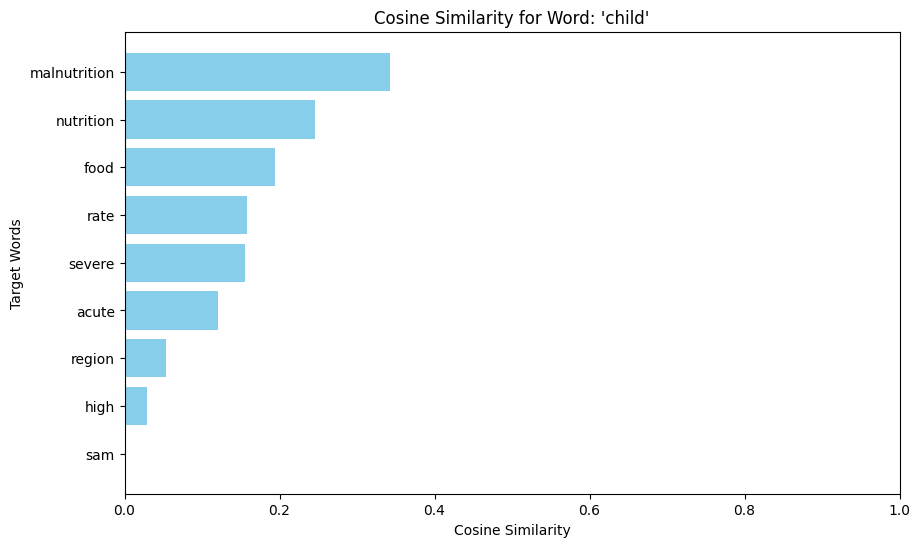

Most popular words for category '9':
Similarity score to the word child:
  woman: 0.4750
  people: 0.2899
  say: 0.2068
  right: 0.1110
  report: 0.1059
  group: 0.0567
  area: 0.0530
  force: 0.0447
  include: 0.0237


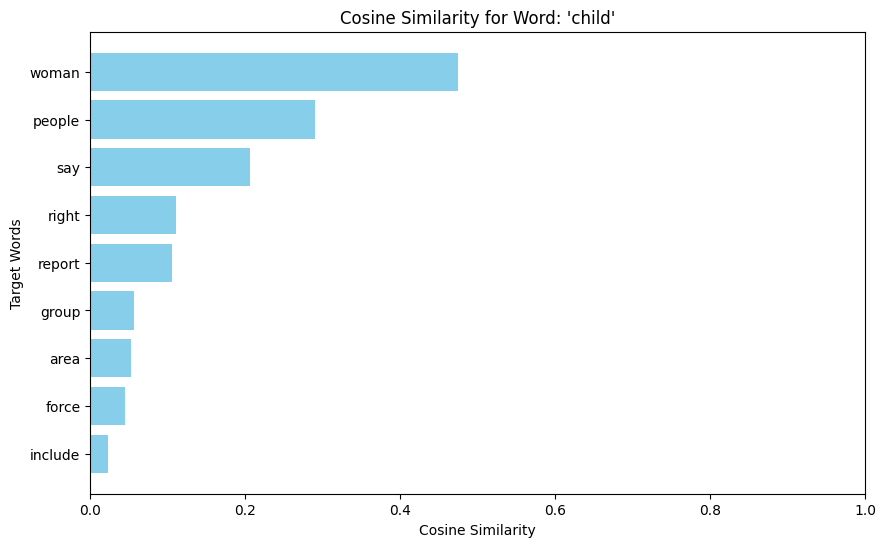

Most popular words for category '10':
Similarity score to the word people:
  family: 0.2686
  shelter: 0.1909
  need: 0.1670
  flood: 0.1664
  house: 0.1629
  area: 0.1538
  damage: 0.1412
  affect: 0.1388
  camp: 0.0722


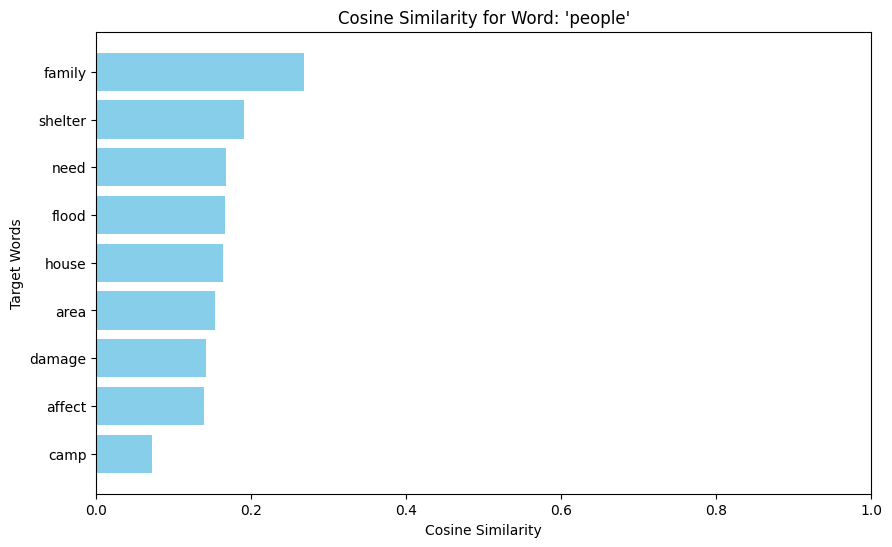

Most popular words for category '11':
Similarity score to the word water:
  supply: 0.3680
  wash: 0.3584
  area: 0.2856
  need: 0.1714
  access: 0.1499
  facility: 0.1491
  people: 0.1407
  source: 0.1105
  camp: 0.0331


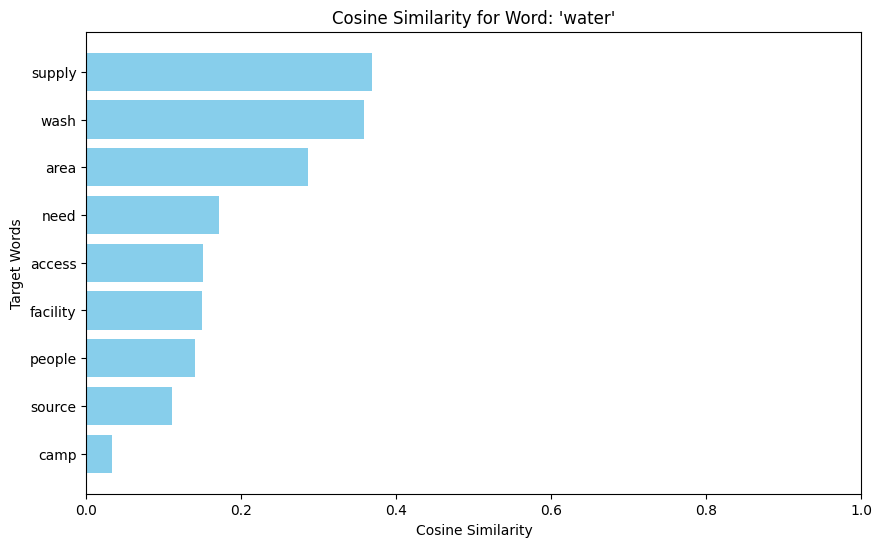

In [42]:
most_pop_words = most_pop_words_from_each_category
for category_ind in range(len(most_pop_words)):
    print(f"Most popular words for category '{labels[category_ind]}':")
    source = most_pop_words[category_ind][0]
    target_words = most_pop_words[category_ind][1:]
    similarities = []
    for target_word in target_words:
        similarity = cosine_similarity(model[source], model[target_word])
        similarities.append((target_word, similarity))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    print(f"Similarity score to the word {source}:")
    for word, similarity in similarities:
        print(f"  {word}: {similarity:.4f}")
    plot_similarity(source, similarities, "Cosine")

### Results
So, for this experiment we chose the words with the highest contribution rates from each category to be the source words and the rest to be the sets of target words. We wanted to calculate the cosine similarity between source words and target words to see if most of the words with high contribution rate correlate with each other and have kinda similar semantic meaning or not. The experiment revealed that only several word pairs in particular topics have a similarity about 0.5, while for most of the word pairs the score is about 0.3 and below. It shows that even though some of the words with high contribution and importance in the category indeed have a relatively high similarity rate, most of the words are not similar to the most important word at all or have rather low similarity rate. This concludes that words with high contribution rates in a category are not necessarily synonims or similar to each other, but rather have different meanings and are used in different contexts.

### Task A Part 1

In [43]:
if(PLOTS_SHOW):
    for item in word_contributions_list:
        for category in item.keys():
            plot_word_contributions(item, category, top_n=20)

Word: car
Cosine similarity to:
  truck: 0.6736
  ship: 0.1696
  sheep: 0.1585
  tool: 0.0933
  mechanism: 0.0919
  lion: 0.0838


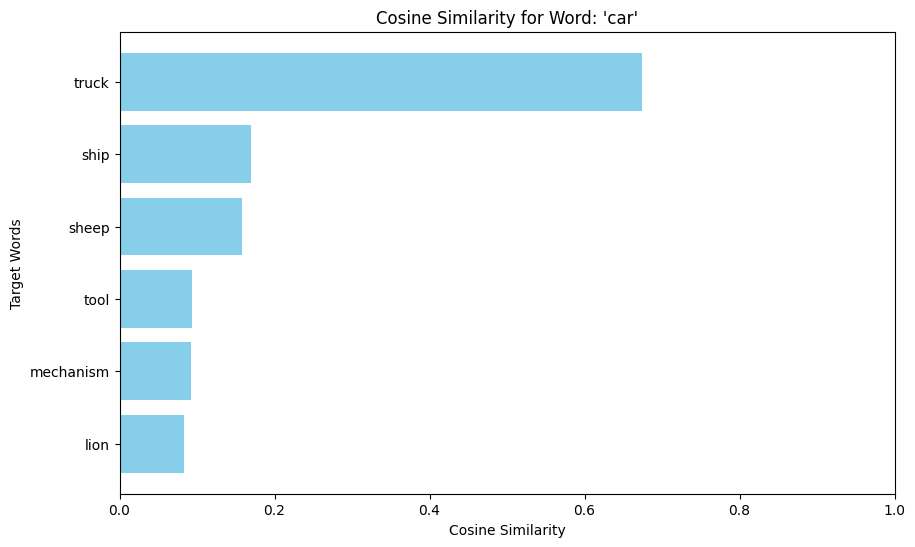

Word: forest
Cosine similarity to:
  ecology: 0.4350
  tree: 0.4218
  lake: 0.3512
  weather: 0.1607
  space: 0.1074
  laptop: 0.0730


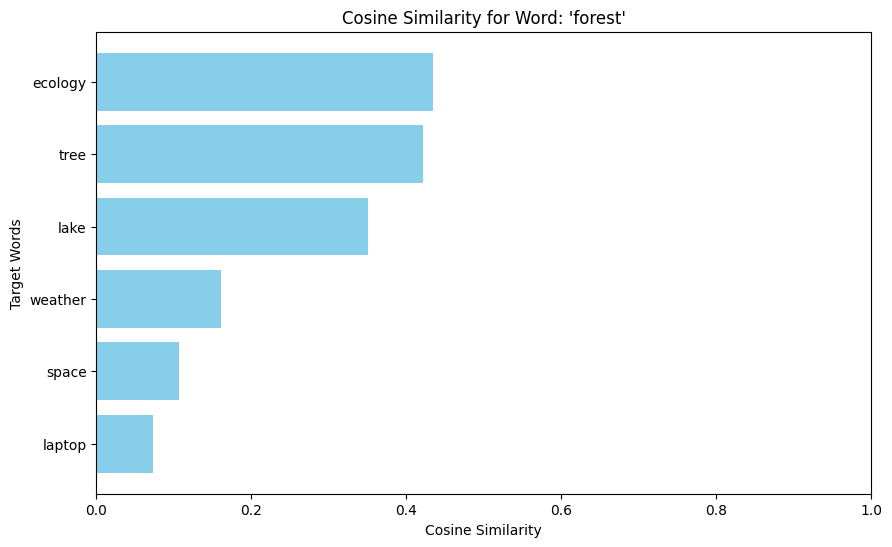

Word: math
Cosine similarity to:
  algebra: 0.7606
  science: 0.5266
  journalism: 0.2532
  formula: 0.2454
  calculate: 0.2123
  trash: 0.0868


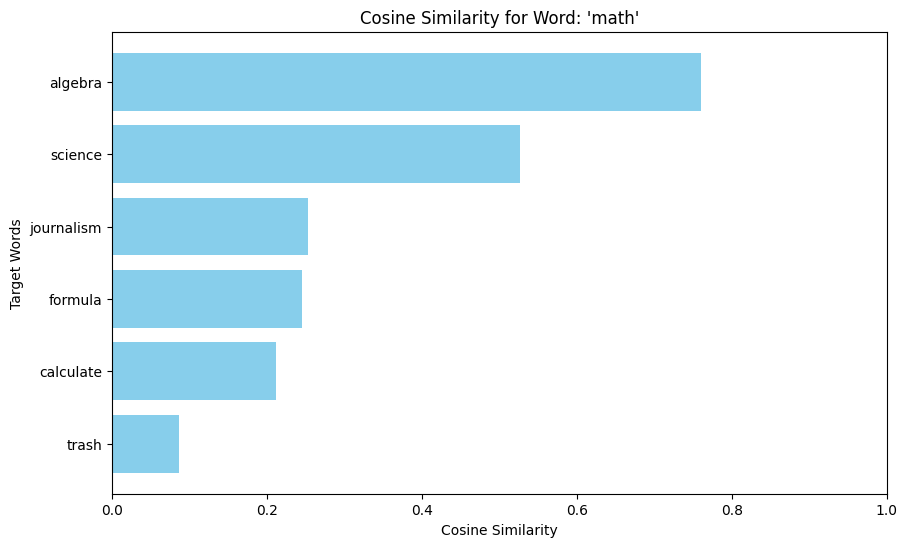

Word: kill
Cosine similarity to:
  death: 0.4023
  weapon: 0.3027
  life: 0.2157
  hug: 0.1877
  food: 0.0905
  party: 0.0219


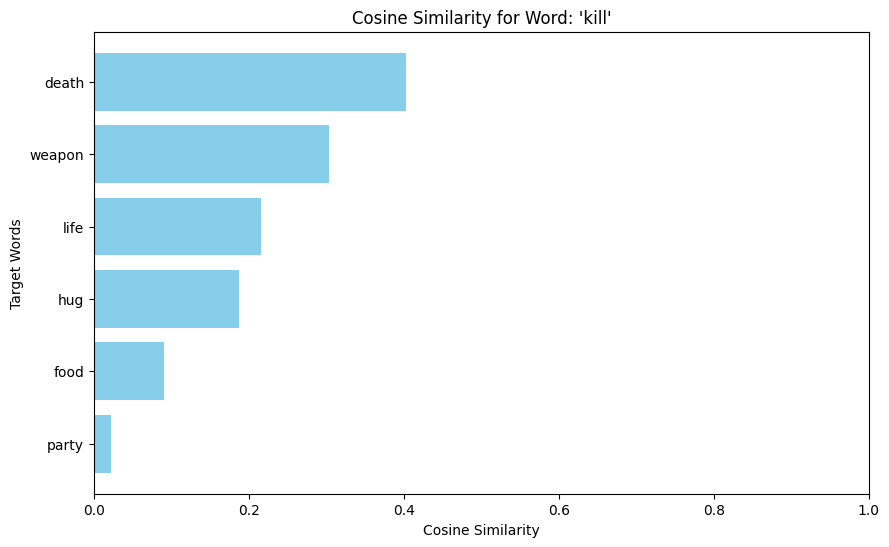

Word: optimistic
Cosine similarity to:
  optimism: 0.5455
  hope: 0.4485
  interesting: 0.2825
  mood: 0.2542
  depressive: 0.1360
  toy: 0.0404


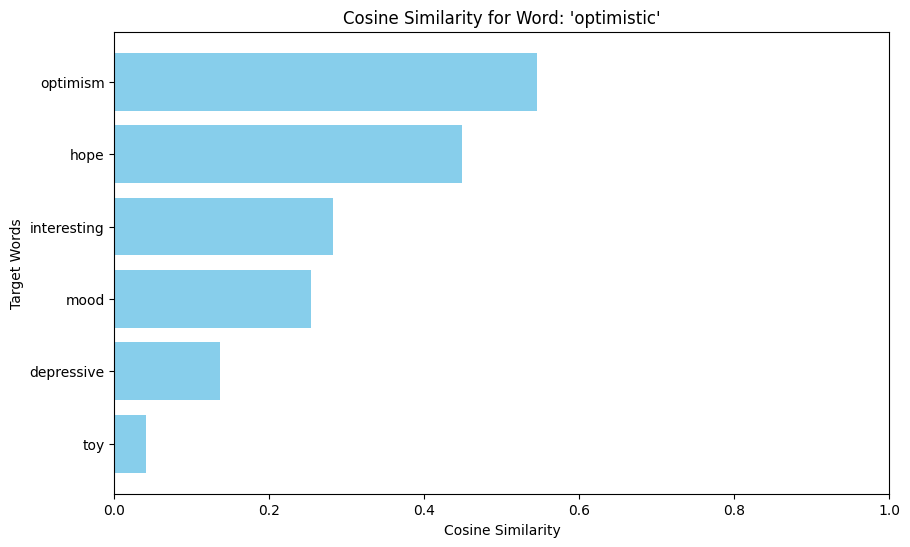

In [44]:
#Cosine similarity test
words = ['car', 'forest', 'math', 'kill', 'optimistic']
target_words = [['truck', 'sheep', 'ship', 'lion', 'mechanism', 'tool'], ['tree', 'lake', 'weather', 'space', 'laptop', 'ecology'], ['algebra', 'science', 'journalism', 'formula', 'calculate', 'trash'], ['death', 'weapon', 'life', 'party', 'food', 'hug'], ['optimism', 'mood', 'depressive', 'toy', 'interesting', 'hope']]
#Calculate and output similarities for each source word and corresponding target words. Plot the graphs
for i in range(len(words)):
    similarities = []
    for target_word in target_words[i]:
        similarity = cosine_similarity(model[words[i]], model[target_word])
        similarities.append((target_word, similarity))
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        #print values 
    print(f"Word: {words[i]}")
    print("Cosine similarity to:")
    for word, similarity in similarities[:6]:
        print(f"  {word}: {similarity:.4f}")
    plot_similarity(words[i], similarities, "Cosine")
    

### Results
In this part of the task we simply used cosine similarity to calculate the similarity between the source words and the target words. We chose 5 simple words from different categories and corresponding 6 target words for each of them. We tried to mix the target words to include the words which are logically similar to the the source words, as well as the words which are not related at all. The results showed that the words which are logically similar to the source words have a relatively high similarity rate, while the words which are not related at all have a low similarity rate. This shows that the cosine similarity is a good metric to calculate the similarity between the words and it works well enough in this case, while we as humans would still probably give somewhere slightly higher and somewhere slightly lower similarity rates to the words, the similar words were ranked correct as expected.

### Task A Part 2

In [45]:
#Let's pick 5 most popular words to calculate the similarity
source_words = []
most_pop_words_1 = most_pop_words.copy()
#select 5 random words from  the most popular words
for i in range(5):
    source_words.append(random.choice(most_pop_words_1[i]))
    
    
target_words = model.index_to_key  #all words in the vocabluary

In [46]:
#Test nearest neighbours
#Cosine similarity

similarities_cos = calculate_nearest_neighbours(source_words, target_words, model, 10, True, False)  
# Display the results
print('Similarity Metrics: Cosine\n')
for source_word, neighbors in similarities_cos.items():
    print(f"Source Word: {source_word}")
    print("Top 10 Neighbors:")
    for neighbor_word, similarity_score in neighbors.items():
        print(f"  {neighbor_word}: {similarity_score:.4f}")
    print("-" * 40)  # Separator for better readability
#Dot product similarity
similarities_dot = calculate_nearest_neighbours(source_words, target_words, model, 10, False, True)
# Display the results
print('Similarity Metrics: Dot product\n')
for source_word, neighbors in similarities_dot.items():
    print(f"Source Word: {source_word}")
    print("Top 10 Neighbors:")
    for neighbor_word, similarity_score in neighbors.items():
        print(f"  {neighbor_word}: {similarity_score:.4f}")
    print("-" * 40)  # Separator for better readability

Similarity Metrics: Cosine

Source Word: area
Top 10 Neighbors:
  area: 1.0000
  areas: 0.6797
  outlying_areas: 0.5878
  region: 0.5685
  vicinity: 0.5611
  neighborhoods: 0.5483
  neighborhood: 0.5397
  Area: 0.5268
  metropolitan: 0.5027
  mile_radius: 0.4948
----------------------------------------
Source Word: say
Top 10 Neighbors:
  say: 1.0000
  believe: 0.7189
  argue: 0.6699
  know: 0.6410
  tell: 0.6164
  insist: 0.6086
  think: 0.5951
  speculate: 0.5628
  presume: 0.5596
  suggest: 0.5486
----------------------------------------
Source Word: need
Top 10 Neighbors:
  need: 1.0000
  needed: 0.7366
  want: 0.6884
  needs: 0.6691
  must: 0.6321
  needing: 0.6211
  can: 0.6192
  should: 0.5851
  do: 0.5776
  needto: 0.5698
----------------------------------------
Source Word: increase
Top 10 Neighbors:
  increase: 1.0000
  decrease: 0.8370
  increases: 0.7709
  increased: 0.7578
  reduction: 0.6908
  increasing: 0.6872
  decreases: 0.6816
  rise: 0.6353
  decreasing: 0.6219
  de

In [47]:
comparison_tables = create_comparison_table(source_words, similarities_cos, similarities_dot)

for source_word, table in comparison_tables.items():
    print(f"Comparison Table for Source Word: {source_word}")
    print(table.to_string(index=False))
    print("-" * 100)


Comparison Table for Source Word: area
Cosine Neighbor  Cosine Similarity               Dot Product Neighbor  Dot Product Similarity
           area           1.000000       your_bizjournals.com_account                6.780400
          areas           0.679674             SuperFan_badge_holders                6.663792
 outlying_areas           0.587848               Suggest_Removal_link                6.547729
         region           0.568542                      PWMForums.com                5.678956
       vicinity           0.561087                   Zawya_encourages                5.261128
  neighborhoods           0.548310                   Newspapers_below                4.591444
   neighborhood           0.539714                   BlockShopper.com                4.466499
           Area           0.526806           thought_provoking_timely                4.310668
   metropolitan           0.502713                               area                4.252512
    mile_radius      

### Results

For this part of the task, we randomly selected 5 common words from the dataset as source words and used the entire Word2Vec vocabulary as target words. We calculated the nearest neighbors for these source words using both cosine similarity and dot product similarity metrics. The results demonstrated a clear difference between the two approaches.

The cosine similarity metric yielded more semantically relevant neighbors, closely related to the meanings of the source words. In contrast, the dot product similarity often included less meaningful or unrelated entries, such as identifiers or non-standard terms. This discrepancy likely arises from the fact that the dot product metric does not account for vector magnitudes, leading to bias toward words with larger embedding norms.

Cosine similarity, by normalizing the vectors, focuses solely on directional similarity, ensuring that results are not influenced by the scale of the vectors. This normalization step likely explains why cosine similarity produced results that were more aligned with human semantic intuition.

In this case, cosine similarity is better suited for identifying semantically similar words.

<a name="section-taskB"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with WE (15 points)</h2>


This task follows the same instruction for document classification as provided in Assignment 1. You are indeed free to reuse any part of your code in Assignment 1 for this task. In Assignment 1, the representation of each document was created using a bag of words representation followed by dimensionality reduction. In this task, the document representations are created from the pre-trained word embeddings.

**Map word embeddings to dictionary words (5 points).** For every word in the dictionary (as discussed and created in Assignment 1), fetch the corresponding word embedding from the pre-trained model. If no embedding is found, initialize the corresponding word embedding randomly.

**Document embedding as the average of word embeddings (5 points).** Using the word embeddings, the representation of each document is defined as the *mean of the vectors of each document's words*. In particular, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document.

**Classification and evaluation (5 points)** Using these new document representations, apply <ins>three classification algorithms</ins> and report the evaluation results (based on accuracy metric) on the test set.



In [48]:
lemmatizer = WordNetLemmatizer()

if WIN_PATHS_ENABLED:
    train = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\NLP\nlp2024_25_data\nlp2023_24_data\thedeep.subset.train.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
    validation = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\NLP\nlp2024_25_data\nlp2023_24_data\thedeep.subset.validation.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
    test = pd.read_csv(r"C:\Users\azatv\Jupyter\JupyterProjects\NLP\nlp2024_25_data\nlp2023_24_data\thedeep.subset.test.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
else:
    train = pd.read_csv(r"/Users/bayve/Desktop/JKU/NLP/Assignments/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.train.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
    validation = pd.read_csv(r"/Users/bayve/Desktop/JKU/NLP/Assignments/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.validation.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')
    test = pd.read_csv(r"/Users/bayve/Desktop/JKU/NLP/Assignments/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.test.txt", sep=",", header=None, names=['ID', 'Text', 'Label'], quoting=1, encoding='utf-8')

train = preprocessing(train)
validation = preprocessing(validation)
test = preprocessing(test)

vocab = create_vocab(train)
word_embeddings = map_word_embeddings(vocab, model)

train_embeddings = compute_document_embeddings(train, word_embeddings)
validation_embeddings = compute_document_embeddings(validation, word_embeddings)
test_embeddings = compute_document_embeddings(test, word_embeddings)

y_train = train["Label"]
y_validation = validation["Label"]
y_test = test["Label"]


In [49]:
# Define a dictionary to store results dynamically
results = []

# Logistic Regression
for C in [0.01, 0.1, 1, 10]:
    lr = LogisticRegression(max_iter=1000, C=C)
    lr.fit(train_embeddings, y_train)
    
    validation_preds = lr.predict(validation_embeddings)
    validation_accuracy = accuracy_score(y_validation, validation_preds)
    
    test_preds = lr.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    results.append({
        "Model": f"Logistic Regression - C={C}",
        "Validation Accuracy": validation_accuracy,
        "Test Accuracy": test_accuracy
    })

# Random Forest
for n_estimators in [50, 100, 150]:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(train_embeddings, y_train)
    
    validation_preds = rf.predict(validation_embeddings)
    validation_accuracy = accuracy_score(y_validation, validation_preds)
    
    test_preds = rf.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    results.append({
        "Model": f"Random Forest - n_estimators={n_estimators}",
        "Validation Accuracy": validation_accuracy,
        "Test Accuracy": test_accuracy
    })

# SVM
for C in [0.01, 0.1, 1, 10]:
    svm = SVC(C=C)
    svm.fit(train_embeddings, y_train)
    
    validation_preds = svm.predict(validation_embeddings)
    validation_accuracy = accuracy_score(y_validation, validation_preds)
    
    test_preds = svm.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    results.append({
        "Model": f"SVM - C={C}",
        "Validation Accuracy": validation_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)



print(results_df)

                               Model  Validation Accuracy  Test Accuracy
0       Logistic Regression - C=0.01             0.562018       0.568015
1        Logistic Regression - C=0.1             0.709168       0.712909
2          Logistic Regression - C=1             0.768105       0.773410
3         Logistic Regression - C=10             0.763867       0.779191
4    Random Forest - n_estimators=50             0.693760       0.707129
5   Random Forest - n_estimators=100             0.712635       0.717919
6   Random Forest - n_estimators=150             0.708783       0.716763
7                       SVM - C=0.01             0.554700       0.562620
8                        SVM - C=0.1             0.726888       0.726782
9                          SVM - C=1             0.785824       0.785742
10                        SVM - C=10             0.785054       0.790366


In [50]:
# RESULTS FROM ASS 1
# Model  Validation Accuracy  Test Accuracy
# 0                Dummy Baseline             0.256163       0.244701
# 1      Logistic Regression (TF)             0.779661       0.768015
# 2  Logistic Regression (TF-IDF)             0.681048       0.737958
# 3            Random Forest (TF)             0.761171       0.759538
# 4        Random Forest (TF-IDF)             0.569337       0.759923

### Results
In this task we used 3 classifiers for evaluation: Logistic Regression, Random Forest and SVM. The highest accuracy was achieved from SVM (C=10) with around 79% Test Accuracy, which slightly outperformed the best result from Assignment 1 (Logistic Regression (TF)) with 76.8% Test Accuracy. Moreover, Logistic Regression (C=10) showed also a slight improvement in accuracy on Test set (by around 1%). However, Random forest with word embedding approach performed worse than Random Forest (TF) with drop in accuracy by around 5%, which is the largest observed performance gap among all classifiers.

Word embeddings demonstrate their effectiveness by outperforming TF and TF-IDF in key cases, particularly with SVM. However, the underperformance of Random Forest showcases that not all classifiers benefit equally from embeddings, possibly due to differences in how they handle dense, semantic-rich features.



<a name="section-taskC"></a><h2 style="color:rgb(0,120,170)">Task C: Classification with sent2vec Document Embeddings (2 extra point)</h2>


Sent2vec [1] suggests another unsupervised approach to creating document embeddings from the underlying word embeddings. First, using the provided code in the paper, train a sendtvec model on the training set to create document embeddings. Then, repeat Task B while using the document embeddings provided by sent2vec. Similar to Task 2, conduct the classification experiments and report evaluation results.

[1] M. Pagliardini, P. Gupta, and M. Jaggi. Unsupervised Learning of Sentence Embeddings using Compositional n-Gram Features. In Proceedings of the conference of the North American Chapter of the Association for Computational Linguistics (NAACL), 2018.
